# Perguntas que serão respondidas com base na análise:

* A) Identificar quais funções precisam ser revisadas. Será considerado 30% como o limite de tolerância para a variação em relação à média e que todas as funções que estiverem além deste limite precisam ser revisadas.
* B) Mostrar um gráfico que apresenta a variação ao longo do tempo, a média, os limites de tolerância e os pontos nos meses em que a variação passa do limite de forma diferenciada.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set()
sns.set_theme(style="whitegrid")

df = pd.read_csv('executions.csv',index_col= None)
df_func = pd.read_csv('functions.csv', index_col=0)

In [25]:
df.head()

,id,date,function_id,execution_time
0,6491,2020-05-27,2,373
1,12540,2020-02-08,4,5806
2,17756,2020-04-19,5,154
3,15598,2020-08-26,5,149
4,5916,2020-01-20,1,257


In [26]:
df_func.head(6)

,function_name,external_component_avg_latency,has_external_component
id,,,
2,doThatThing,0,False
1,doThisThing,30,True
3,accessAnotherThing,1000,True
5,fetchThisMetadata,20,True
4,sendAFile,2500,True
0,checkSomething,0,False


In [27]:
def get_function_latency(id):
    return df_func.external_component_avg_latency[id] 

In [28]:
df.iloc[0].date

'2020-05-27'

# Limpeza de dados:
lorem lorem lorem

In [29]:
df['real_exe_time'] = df.execution_time - df.function_id.apply(get_function_latency)
df.drop(['id','execution_time'], axis=1, inplace = True)

In [30]:
df.head()

,date,function_id,real_exe_time
0,2020-05-27,2,373
1,2020-02-08,4,3306
2,2020-04-19,5,134
3,2020-08-26,5,129
4,2020-01-20,1,227


In [31]:
def get_function_data(dataframe,function_id, get_df = False):
    df_test = dataframe.copy()
    df_test = df_test.loc[df_test['function_id'] == function_id]
    df_test.sort_values(by = ['date'], inplace= True)
    if get_df:
        return df_test
    else:
        df = {'function_id': function_id, 'mean': df_test.mean(), 
             'mean+30%':(round(df_test.mean()*1.3)),'mean-30%':(round(df_test.mean()*0.7)),
             'min': df_test.min(),'max':df_test.max()
            }
        df_results = pd.DataFrame(data=df)
        df_results.drop(['date', 'function_id'], inplace = True)
        return df_results
    
def date_to_monthName(df):
    for index in df.index:
        if '2020-01-01' <=df.loc[index,'date'] <= '2020-01-31':
            df.loc[index,'date'] = 'Jan'
        elif '2020-02-01' <=df.loc[index,'date'] <= '2020-02-31':
            df.loc[index,'date'] = 'Fev'
        elif '2020-03-01' <=df.loc[index,'date'] <= '2020-03-31':
            df.loc[index,'date'] = 'Mar'
        elif '2020-04-01' <=df.loc[index,'date'] <= '2020-04-31':
            df.loc[index,'date'] = 'Abr'
        elif '2020-05-01' <=df.loc[index,'date'] <= '2020-05-31':
            df.loc[index,'date'] = 'Mai'
        elif '2020-06-01' <=df.loc[index,'date'] <= '2020-06-31':
            df.loc[index,'date'] = 'Jun'
        elif '2020-07-01' <=df.loc[index,'date'] <= '2020-07-31':
            df.loc[index,'date'] = 'Jul'
        elif '2020-08-01' <=df.loc[index,'date'] <= '2020-08-31':
            df.loc[index,'date'] = 'Ago'
        elif '2020-09-01' <=df.loc[index,'date'] <= '2020-09-31':
            df.loc[index,'date'] = 'Set'
        elif '2020-10-01' <=df.loc[index,'date'] <= '2020-10-31':
            df.loc[index,'date'] = 'Out'
        elif '2020-11-01' <=df.loc[index,'date'] <= '2020-11-31':
            df.loc[index,'date'] = 'Nov'
        else:
            df.loc[index,'date'] = 'Dez'

In [32]:
d = [get_function_data(df,0),
      get_function_data(df,1),
      get_function_data(df,2),
      get_function_data(df,3),
      get_function_data(df,4),
      get_function_data(df,5)]
results = pd.concat(d)

In [33]:
results.head(6)

,function_id,mean,mean+30%,mean-30%,min,max
real_exe_time,0,66.107667,86.0,46.0,49,85
real_exe_time,1,223.987667,291.0,157.0,211,235
real_exe_time,2,329.945333,429.0,231.0,256,408
real_exe_time,3,33.140000,43.0,23.0,17,50
real_exe_time,4,3301.949333,4293.0,2311.0,2940,3698
real_exe_time,5,132.090667,172.0,92.0,93,170


In [34]:
df_inc = get_function_data(df, 3, get_df = True)
df_inc.head()

,date,function_id,real_exe_time
15597,2020-01-01,3,31
9117,2020-01-01,3,30
510,2020-01-01,3,33
15070,2020-01-02,3,38
11651,2020-01-02,3,36


In [35]:
date_to_monthName(df_inc)
df_inc.reset_index(inplace=True) 
df_inc.drop(columns=['index'], inplace= True)
df_inc['mean'] = 33.14
df_inc['mean+30%'] = 43.0
df_inc['mean-30%'] = 23.0

df_inc.head()

,date,function_id,real_exe_time,mean,mean+30%,mean-30%
0,Jan,3,31,33.14,43.0,23.0
1,Jan,3,30,33.14,43.0,23.0
2,Jan,3,33,33.14,43.0,23.0
3,Jan,3,38,33.14,43.0,23.0
4,Jan,3,36,33.14,43.0,23.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='date', ylabel='real_exe_time'>

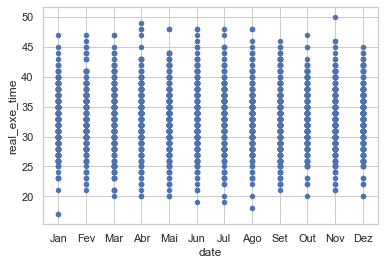

In [36]:
df_inc.plot.scatter(x = 'date', y = 'real_exe_time')

<AxesSubplot:xlabel='date'>

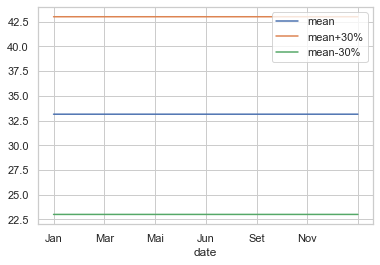

In [37]:
df_inc.plot(x='date', y=['mean','mean+30%','mean-30%'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

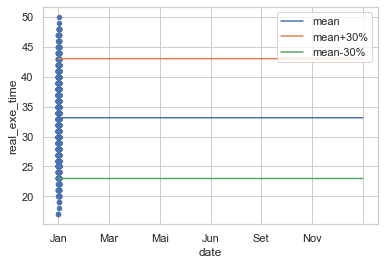

In [23]:
fig=plt.figure()
ax = df_inc.plot(x='date', y=['mean','mean+30%','mean-30%']);
df_inc.plot.scatter(x = 'date', y = 'real_exe_time', ax=ax)

plt.show()

In [ ]:
sns.relplot(
    data=df_test,
    x="date", y="real_exe_time"
)

In [ ]:
color_palette=sns.diverging_palette(10, 130, sep=100, n=10, as_cmap=True)
plt.scatter(df_test.date, df_test.real_exe_time, c=scatter_data.score, cmap=color_palette)
#plt.plot(linear_data.index, linear_data['y'], marker="o")
plt.show()

In [38]:
#Transform the date to datetime object
df_inc['date']=pd.to_datetime(df_inc['date'])
fig=plt.figure()
ax = df_inc.plot(x='date', y=['mean','mean+30%','mean-30%']);
df_inc.plot.scatter(x = 'date', y = 'real_exe_time', ax=ax)

plt.show()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00